In [1]:
import dataset
import matplotlib.pyplot as plt
import tree_search
import sympy
sympy.init_printing()

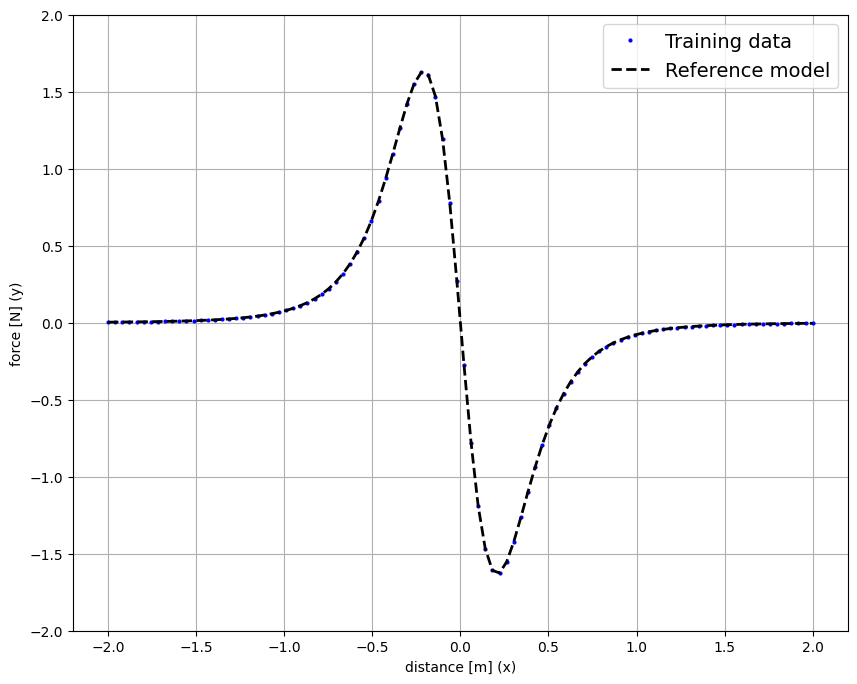

In [2]:
S = dataset.MagmanDatasetScaled()
S.sample(size=100, noise=0.0, mesh=True)
S.plot()

In [3]:
avg, std = tree_search.compute_smoothness(S)
print(f"Avg: {avg}\nStd: {std}")

Avg: -0.0018414805845339871
Std: 3.2432530728419513


In [4]:
"""from pymoo.core.problem import Problem
from pymoo.algorithms.soo.nonconvex.es import ES
from pymoo.optimize import minimize

class MyProblem(Problem):

    def __init__(self):
        super().__init__(n_var=len(S.data), n_obj=1, xl=S.yl, xu=S.yu)

    def _evaluate(self, x, out, *args, **kwargs):
        evals = []
        for sol in x:
            slopes = []
            n = len(sol)
            for i in range(1, n):
                beta_i   = math.log(S.data[i].y, sol[i])
                beta_i_1 = math.log(S.data[i - 1].y, sol[i - 1])
                slopes.append( (beta_i - beta_i_1) / (1) )
                slopes.append( (sol[i] - sol[i-1]) / (1) )
            evals.append(np.std(slopes))
        
        out["F"] = np.row_stack(evals)

algorithm = ES(n_offsprings=200, pop_size=50)

res = minimize(MyProblem(),
               algorithm,
               ("n_gen", 5000),
               seed=1,
               verbose=False)

print("Best solution found: \nX = %s\nF = %s" % (res.X, res.F))"""

'from pymoo.core.problem import Problem\nfrom pymoo.algorithms.soo.nonconvex.es import ES\nfrom pymoo.optimize import minimize\n\nclass MyProblem(Problem):\n\n    def __init__(self):\n        super().__init__(n_var=len(S.data), n_obj=1, xl=S.yl, xu=S.yu)\n\n    def _evaluate(self, x, out, *args, **kwargs):\n        evals = []\n        for sol in x:\n            slopes = []\n            n = len(sol)\n            for i in range(1, n):\n                beta_i   = math.log(S.data[i].y, sol[i])\n                beta_i_1 = math.log(S.data[i - 1].y, sol[i - 1])\n                slopes.append( (beta_i - beta_i_1) / (1) )\n                slopes.append( (sol[i] - sol[i-1]) / (1) )\n            evals.append(np.std(slopes))\n        \n        out["F"] = np.row_stack(evals)\n\nalgorithm = ES(n_offsprings=200, pop_size=50)\n\nres = minimize(MyProblem(),\n               algorithm,\n               ("n_gen", 5000),\n               seed=1,\n               verbose=False)\n\nprint("Best solution found: \

In [5]:
#alphas, betas, _, _ = tree_search.infer_operator(S, opt='pow')
#print(alphas)
#print(betas)

"""import sympy
x = sympy.Symbol("x")
res = sympy.nsolve((x ** 2) + 1, x, 23, verify=False)
print(res)"""

"""alphas, betas = tree_search.infer_operator_slq_optimz(S, opt='sum')
print("___SOLUTION___")
print(alphas)
print(betas)"""

stree, Y, inter_points, mse = tree_search.infer_syntaxtree(S, max_degree=6, max_depth=4, trials=150)
print(f"MSE: {mse}")

c:\Users\Agostino\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
c:\Users\Agostino\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


MSE: 5.331936381308092e-22


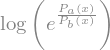

In [6]:
sympy.parse_expr(stree.tostring())

-2.0, 0.0036829611690682995
2.0, -0.0036829611690680775
-0.909090909090909, 0.11052980171981863
-0.06060606060606055, 0.7799516799873958
-0.5858585858585856, 0.46035737358289186
-1.5555555555555556, 0.011718598072253172
-0.2222222222222221, 1.6253860807974805
0.666666666666667, -0.3182666403102101
1.878787878787879, -0.0049324558533128116
-0.18181818181818166, 1.607823965159568
1.7979797979797985, -0.006048038717160198
-0.8686868686868685, 0.13081897101477402
-0.02020202020202011, 0.27187993947254974
-0.06060606060606055, 0.7799516799873958


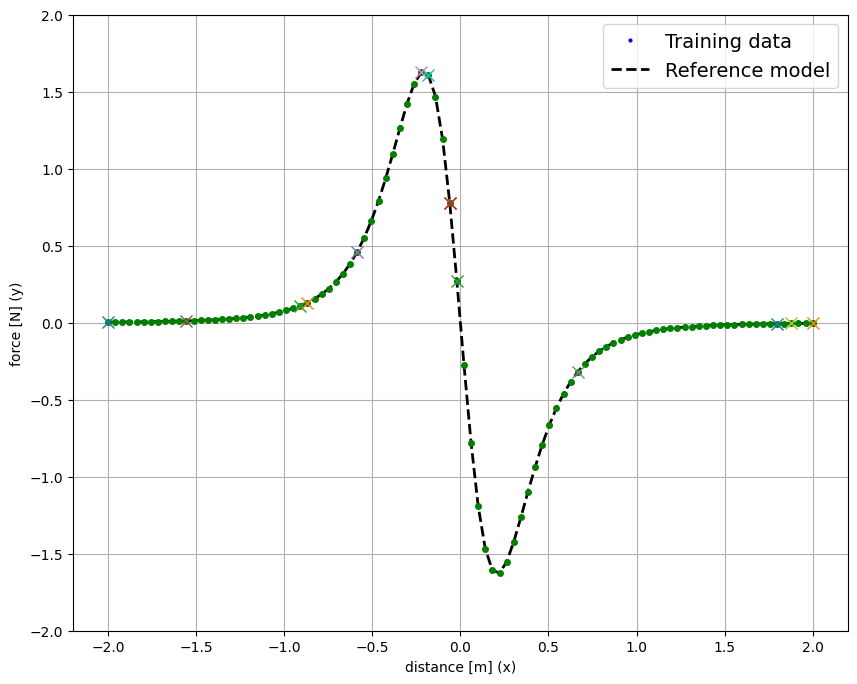

In [7]:
S.plot()
n = len(S.data)

for i in range(n):
    plt.plot(S.data[i].x, Y[i], 'go', markersize=4, label='beta')

#plt.ylim(( min(min(alphas), min(betas)), max(max(alphas), max(betas)) ))

for dp in inter_points:
    plt.plot(dp.x, dp.y, 'x', markersize=8, label='inter_point')
    print(f"{dp.x}, {dp.y}")